<a href="https://colab.research.google.com/github/pratham49x/DataScienceSkillcraft/blob/main/t3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the dataset (assuming it's saved locally as 'bank_data.csv')
data_url = 'https://archive.ics.uci.edu/static/public/222/data.csv'
data = pd.read_csv(data_url)

In [ ]:

# Fill missing values in categorical columns with 'unknown'
data['job'].fillna('unknown', inplace=True)
data['education'].fillna('unknown', inplace=True)
data['contact'].fillna('unknown', inplace=True)

<ipython-input-5-a94832e955a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job'].fillna('unknown', inplace=True)
<ipython-input-5-a94832e955a5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
# Fill missing values in numeric columns with their respective column means
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [ ]:
# Encoding categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'poutcome']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [ ]:
# Splitting the data into features and target
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for target

# Scaling numerical features
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[11505   461]
 [  962   636]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.58      0.40      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.75      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564



In [ ]:
# ROC AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_score:.2f}")

ROC AUC Score: 0.84


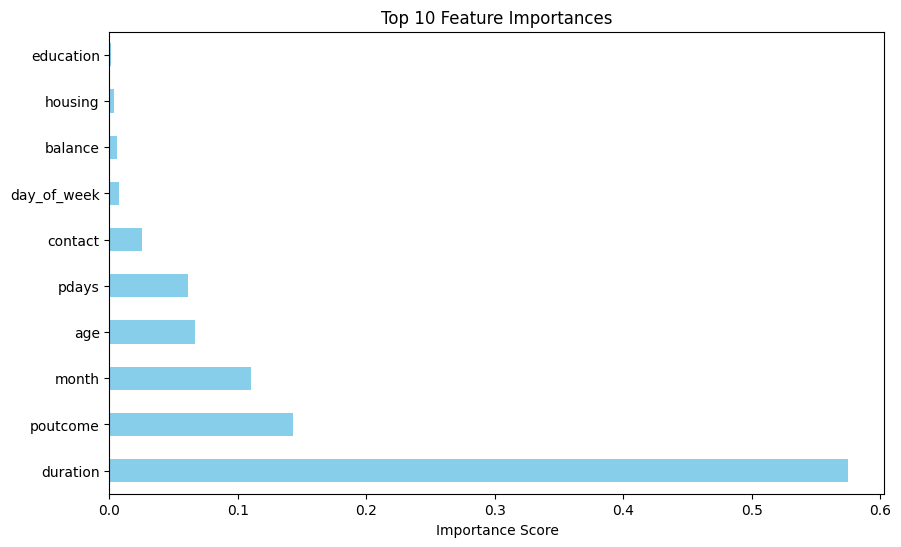

In [ ]:
# Visualizations
# Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


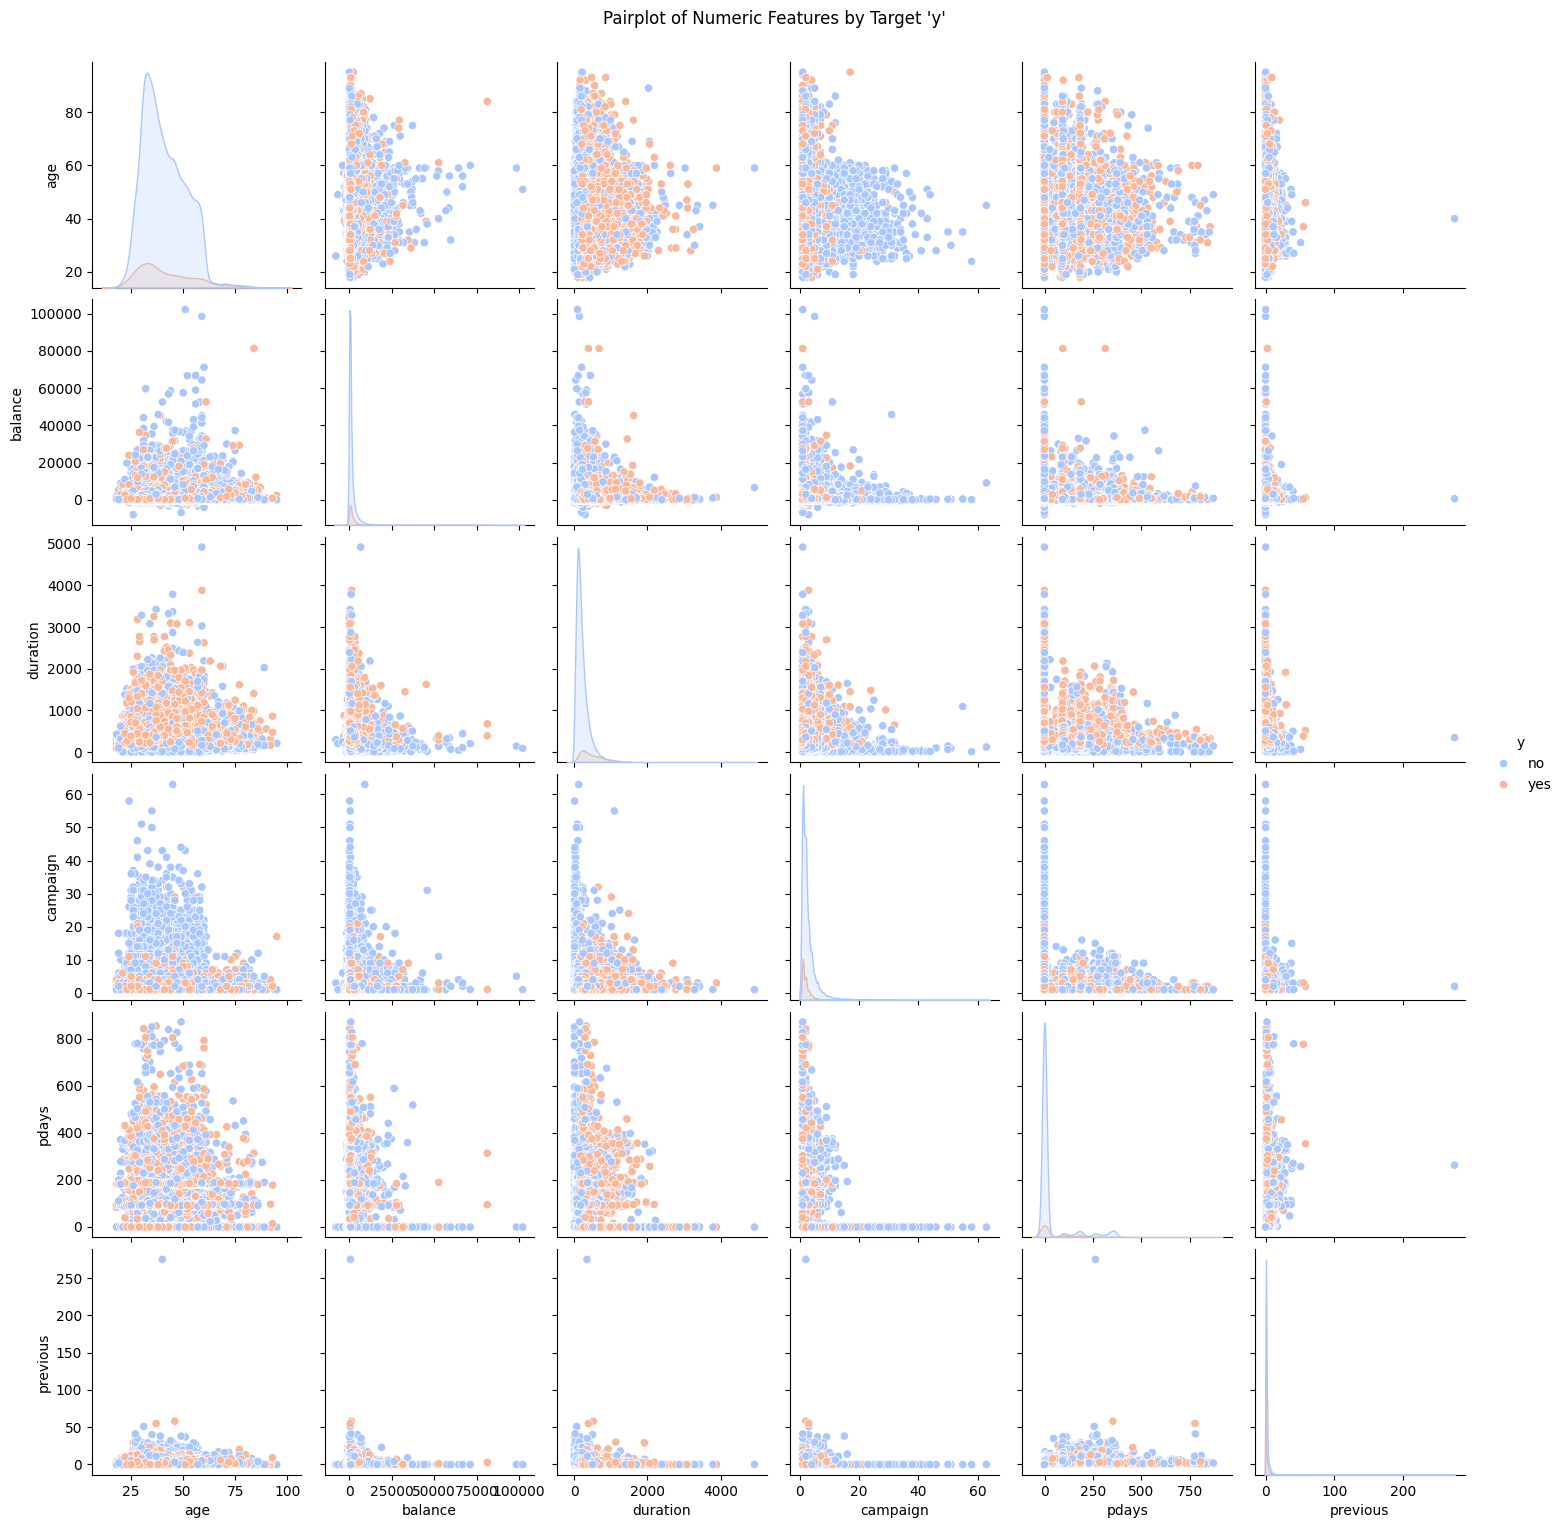

In [ ]:
# Pairplot to check distributions in numeric columns
sns.pairplot(data[numeric_cols + ['y']], hue='y', palette='coolwarm')
plt.suptitle("Pairplot of Numeric Features by Target 'y'", y=1.02)
plt.show()


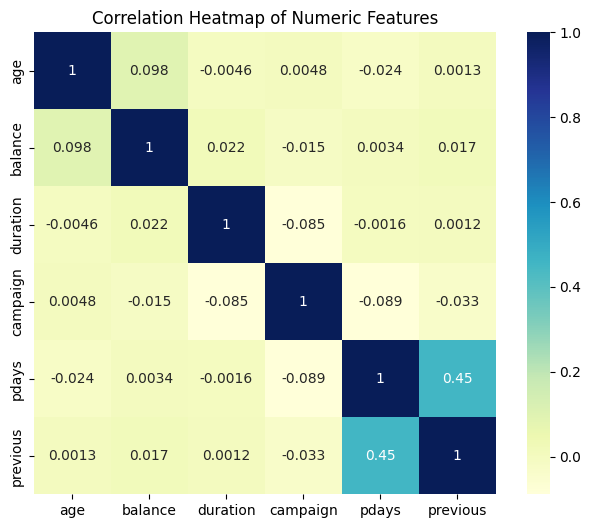

In [ ]:
# Heatmap for correlations among numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="YlGnBu", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
